In [1]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import collections  
import matplotlib.cm as cm
from matplotlib.colors import Normalize

In [9]:
url = f"https://api.opendota.com/api/teams"
response = requests.get(url)
teams_data = response.json()

In [10]:
tl_id = []
for teams in teams_data: 
    if teams['name'] == 'Team Liquid': 
        tl_id = teams['team_id']
        print(tl_id)

2163


In [11]:
def team_info(tl_id):
    url = f"https://api.opendota.com/api/teams/{tl_id}"
    response = requests.get(url)
    return response.json()

In [13]:
def win_rate(tl_id):
    team_data = team_info(tl_id)
    wins = team_data['wins']
    losses = team_data['losses']
    total = wins + losses
    win_rate = (wins / total) * 100 if total > 0 else 0
    return round(win_rate, 1)
print(f"Team Liquid has a winrate of {win_rate(tl_id)}%")

Team Liquid has a winrate of 59.6%


In [14]:
def get_matches(tl_id):
    url = f"https://api.opendota.com/api/teams/{tl_id}/matches"
    response = requests.get(url)
    matches = response.json()
    return matches[:4]

In [15]:
matches = get_matches(tl_id)

In [16]:
def format_duration(duration):
    hours = duration // 3600             
    minutes = (duration % 3600) // 60    
    seconds = duration % 60    
    if hours > 0:
        return f"{hours}h {minutes}m {seconds}s"
    else:
        return f"{minutes}m {seconds}s"

In [17]:
def team_side(match):
    if match['radiant']:
        return True  
    else:
        return False

In [18]:
match_results = []
for match in matches:
    is_radiant = team_side(match)
    if (is_radiant and match['radiant_win']) or (not is_radiant and not match['radiant_win']):
        match_results.append(1)
    else:
        match_results.append(0)
    duration_formatted = format_duration(match['duration'])
    print(f"Result: {match_results}, Duration: {duration_formatted}")

Result: [0], Duration: 30m 43s
Result: [0, 0], Duration: 40m 39s
Result: [0, 0, 1], Duration: 37m 31s
Result: [0, 0, 1, 0], Duration: 44m 9s


In [21]:
for match in matches:
    is_radiant = team_side(match)
    if (is_radiant and match['radiant_win']) or (not is_radiant and not match['radiant_win']):
        result = 'Win'
    else:
        result = 'Lose'
    duration_formatted = format_duration(match['duration'])
    print(f"Result: {result}, Duration: {duration_formatted}")

Result: Lose, Duration: 30m 43s
Result: Lose, Duration: 40m 39s
Result: Win, Duration: 37m 31s
Result: Lose, Duration: 44m 9s


In [22]:
match_ids = []
for match in matches:
    match_ids.append(match['match_id']) 

In [24]:
count = 0
count1 = 1
total_kils = 0

for match in matches:
    is_radiant = team_side(match)
    radiant_score = match['radiant_score']
    dire_score = match['dire_score']
    total_score_match = radiant_score + dire_score
    total_kils += total_score_match 
    print(f"{count1} Match has {total_score_match} kills")
    if is_radiant == True:
        print(f"Liquid have {radiant_score} kills")
        print(f"The other team has {dire_score} kills")
    
    elif is_radiant == False:
        print(f"Liquid have {dire_score} kills")
        print(f"The other team has {radiant_score} kills")

    count += 1
    count1 += 1
    
mean = (total_kils/count)
print(f"The mean kill at last matches was {mean} kils")
print(f"The number os totals kills was {total_kils}")

1 Match has 30 kills
Liquid have 8 kills
The other team has 22 kills
2 Match has 72 kills
Liquid have 35 kills
The other team has 37 kills
3 Match has 46 kills
Liquid have 30 kills
The other team has 16 kills
4 Match has 72 kills
Liquid have 30 kills
The other team has 42 kills
The mean kill at last matches was 55.0 kils
The number os totals kills was 220


In [25]:
total_duration = 0
for match in matches:
    total_duration += match['duration']  
mean = total_duration / 4
print(f"The total duration time of the matches was {format_duration(total_duration)}")  
print(f"The average duration time of each match was {format_duration(mean)}")  

The total duration time of the matches was 2h 33m 2s
The average duration time of each match was 38.0m 15.5s


In [26]:
def get_match_detail(match_ids):
    url = f"https://api.opendota.com/api/matches/{match_id}"
    response = requests.get(url)
    return response.json()

In [27]:
url = f'https://api.opendota.com/api/teams/{tl_id}/players'
response = requests.get(url) 
players1 = response.json()
players_name = []
for player in players1:
    account_id = player.get('name')
    in_team = player.get("is_current_team_member")
    if account_id and in_team == True:
        players_name.append(account_id)

In [28]:
mean_kda = {player_name: [] for player_name in players_name} 
mean_kills = {player_name: [] for player_name in players_name} 
mean_deaths = {player_name: [] for player_name in players_name} 
mean_assists = {player_name: [] for player_name in players_name} 

for match_id in match_ids:
    match_data = get_match_detail(match_id)
    players = match_data['players']
    
    for player in players:
        player_name = player.get('name', 'Unknown')
        if player_name in players_name:
            kills = player['kills']
            deaths = player['deaths']
            assists = player['assists']
            kda = (kills + assists) / (deaths if deaths > 0 else 1) 

            mean_kda[player_name].append(kda)
            mean_kills[player_name].append(kills)
            mean_deaths[player_name].append(deaths)
            mean_assists[player_name].append(assists)


for player_name in players_name:
    kda_lista = mean_kda[player_name]
    kills_lista = mean_kills[player_name]
    deaths_lista = mean_deaths[player_name]
    assists_lista = mean_assists[player_name]
    
    kda_medio = sum(kda_lista) / len(kda_lista) if kda_lista else 0
    kills_medio = sum(kills_lista) / len(kills_lista) if kills_lista else 0
    deaths_medio = sum(deaths_lista) / len(deaths_lista) if deaths_lista else 0
    assists_medio = sum(assists_lista) / len(assists_lista) if assists_lista else 0
    
    if kda_medio > 0:    
        print(f"The player {player_name} has an average KDA of {kda_medio:.2f}.")
        print(f" - Average kills: {kills_medio:.2f}")
        print(f" - Average deaths: {deaths_medio:.2f}")
        print(f" - Average assists: {assists_medio:.2f}")

The player Insania  has an average KDA of 2.67.
 - Average kills: 2.75
 - Average deaths: 7.25
 - Average assists: 16.50
The player m1CKe has an average KDA of 5.01.
 - Average kills: 5.25
 - Average deaths: 4.75
 - Average assists: 10.25
The player Boxi has an average KDA of 3.04.
 - Average kills: 4.25
 - Average deaths: 7.50
 - Average assists: 15.50
The player Nisha has an average KDA of 7.97.
 - Average kills: 7.50
 - Average deaths: 5.25
 - Average assists: 13.00
The player El SaberLightO has an average KDA of 8.49.
 - Average kills: 6.00
 - Average deaths: 4.50
 - Average assists: 12.50


In [29]:
def get_hero_mapping():
    url = "https://api.opendota.com/api/heroes"
    response = requests.get(url)
    heroes_data = response.json()
    
    hero_mapping = {hero['id']: hero['localized_name'] for hero in heroes_data}
    return hero_mapping

hero_mapping = get_hero_mapping()

In [30]:
hero_counter = collections.Counter()

for match_id in match_ids:
    match_data = get_match_detail(match_id)
    players = match_data['players']
    
    for player in players:
        hero_id = player['hero_id']
        hero_counter[hero_id] += 1

top_heroes = hero_counter.most_common(5)

print("Heroes that appeared most in recent matches:")
for hero_id, count in top_heroes:
    hero_name = hero_mapping.get(hero_id, "Unknown")
    print(f"Hero {hero_name} appeared {count} times.")

Heroes that appeared most in recent matches:
Hero Enchantress appeared 3 times.
Hero Pangolier appeared 3 times.
Hero Dragon Knight appeared 3 times.
Hero Earth Spirit appeared 2 times.
Hero Alchemist appeared 2 times.


In [31]:
data = []

for player_name in players_name:
    for i, kda in enumerate(mean_kda[player_name]):
        data.append({
            'match_id': match_ids[i],
            'player_name': player_name,
            'kda': kda,
            'kills': mean_kills[player_name][i],
            'deaths': mean_deaths[player_name][i],
            'assists': mean_assists[player_name][i]
        })

df = pd.DataFrame(data)

In [32]:
df

,match_id,player_name,kda,kills,deaths,assists
0,8018435024,Insania,2.333333,0,3,7
1,8018369934,Insania,2.400000,4,10,20
2,8018290710,Insania,3.714286,6,7,20
3,8016425064,Insania,2.222222,1,9,19
4,8018435024,m1CKe,5.000000,3,1,2
5,8018369934,m1CKe,2.428571,2,7,15
6,8018290710,m1CKe,10.500000,8,2,13
7,8016425064,m1CKe,2.111111,8,9,11
8,8018435024,Boxi,0.600000,1,10,5
9,8018369934,Boxi,3.285714,8,7,15


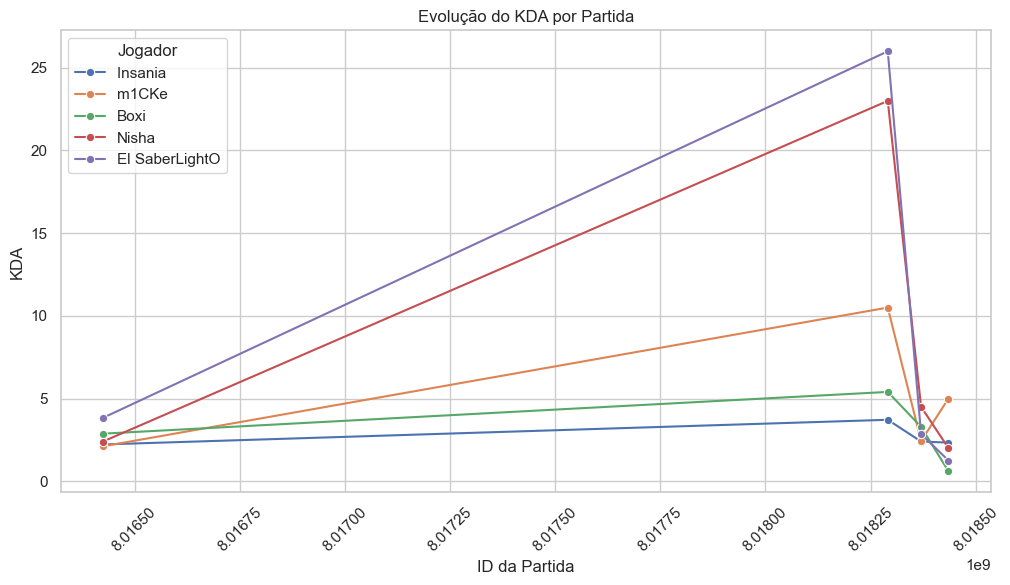

In [33]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='match_id', y='kda', hue='player_name', marker='o')

plt.title("Evolução do KDA por Partida")
plt.xlabel("ID da Partida")
plt.ylabel("KDA")
plt.legend(title="Jogador")
plt.xticks(rotation=45)
plt.show()

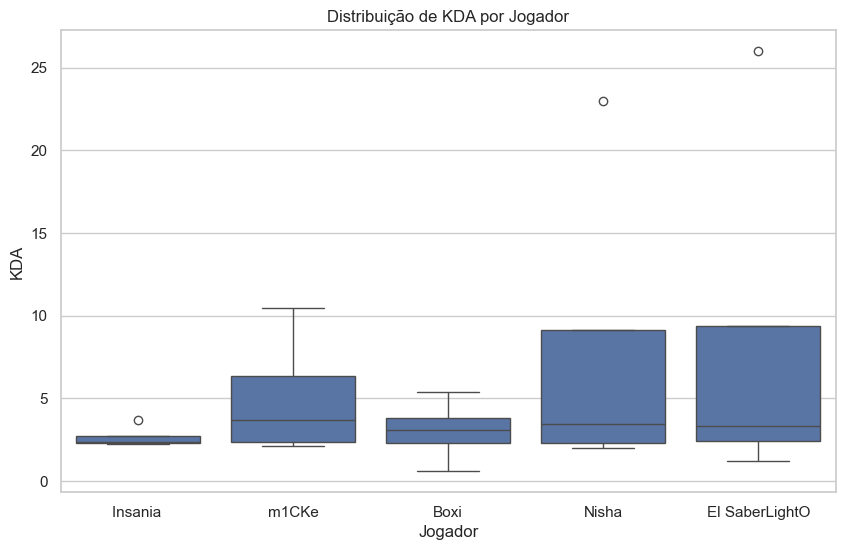

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='player_name', y='kda')
plt.title("Distribuição de KDA por Jogador")
plt.xlabel("Jogador")
plt.ylabel("KDA")
plt.show()

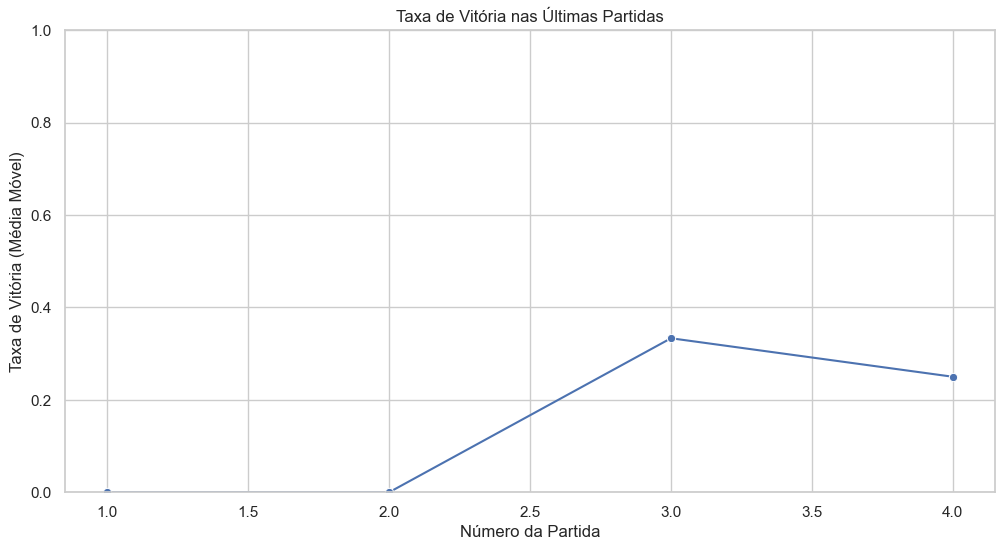

In [35]:
df = pd.DataFrame({'win_result': match_results})
df['match_number'] = range(1, len(df) + 1) 
df['moving_win_rate'] = df['win_result'].rolling(window=5, min_periods=1).mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='match_number', y='moving_win_rate', marker='o', color='b')
plt.title("Taxa de Vitória nas Últimas Partidas")
plt.xlabel("Número da Partida")
plt.ylabel("Taxa de Vitória (Média Móvel)")
plt.ylim(0, 1)  

plt.show()